In [1]:
# Import necessary libraries

# Data manipulation and numerical operations
import pandas as pd
import numpy as np

# Preprocessing tools from scikit-learn
from sklearn.preprocessing import StandardScaler, LabelEncoder
# StandardScaler: Standardizes features by removing mean and scaling to unit variance
# LabelEncoder: Converts categorical labels to numerical values

from sklearn.model_selection import train_test_split
# Used to split data into training and testing sets

# TensorFlow and Keras for building and training neural networks
import tensorflow as tf
from tensorflow.keras.models import Sequential
# Sequential: Linear stack of layers for building neural network
from tensorflow.keras.layers import Dense
# Dense: Fully connected neural network layer

import matplotlib.pyplot as plt
# For creating visualizations of model performance

# Import metrics for model evaluation
from sklearn.metrics import classification_report, confusion_matrix

Couldn't import dot_parser, loading of dot files will not be possible.


In [2]:
# Load and preprocess data
print("Loading and preprocessing data...")
data = pd.read_csv('sample_recs_data_LogisticR.csv')

# Remove rows with missing values to ensure data quality
data_cleaned = data.dropna()

# Prepare features (X) and target (y)
# Features: Environmental and building characteristics
X = data_cleaned[['HDD65', 'TOTSQFT_EN', 'WINDOWS', 'BTUELCOL']]
# Target: Type of thermostat
y = (data_cleaned['TYPETHERM'] == 3).astype(int)  # 1 (True) if smart thermostat, 0 otherwise

Loading and preprocessing data...


In [3]:
# Convert categorical target variable to numerical format
# Necessary for neural network processing
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [4]:
# Split data into training (60%) and testing (40%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

In [5]:
# Scale features to standardize their ranges
# Fit scaler on training data only to prevent data leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Build the neural network architecture
model = Sequential([
    # First hidden layer: 16 neurons with ReLU activation
    Dense(16, activation='relu', input_shape=(4,)), # four input features.
    # Second hidden layer: 8 neurons with ReLU activation
    Dense(8, activation='relu'),
    # Output layer: neurons match number of classes, sigmoid for probability distribution
    Dense(len(np.unique(y_encoded)), activation='sigmoid')
])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Configure the model for training
model.compile(
    optimizer='adam',  # Adam optimizer for efficient gradient descent
    loss='sparse_categorical_crossentropy',  # Appropriate loss function for classification
    metrics=['accuracy']  # Monitor accuracy during training
)

In [8]:
print("\nModel Summary:")
model.summary() 
# Param calculation: params = (inputs * neurons) + neurons
# First layer: (4 * 16) + 16 = 80 (four inputs, 16 neurons)
# Second layer: (16 * 8) + 8 = 136 (16 inputs, 8 neurons)
# Output layer: (8 * 4) + 4 = 36 (8 inputs, 4 neurons)


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 234 (936.00 B)

 Trainable params: 234 (936.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
print("\nTraining the model...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,  # Number of complete passes through the training data
    batch_size=32,  # Number of samples processed before model update. Common values: 32, 64, 128.
    validation_split=0.2,  # 20% of training data used for validation
    verbose=1  # Show training progress (0 for none, 1 for progress bar, 2 for one line per epoch)
)


Training the model...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2999 - loss: 0.8080 - val_accuracy: 0.2500 - val_loss: 0.7529
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4362 - loss: 0.7732 - val_accuracy: 0.2500 - val_loss: 0.7403
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4125 - loss: 0.7811 - val_accuracy: 0.2500 - val_loss: 0.7278
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4825 - loss: 0.7629 - val_accuracy: 0.2500 - val_loss: 0.7159
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5317 - loss: 0.7400 - val_accuracy: 0.4167 - val_loss: 0.7042
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5355 - loss: 0.7413 - val_accuracy: 0.5833 - val_loss: 0.6925
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5601 - loss: 0.7196 - val_accuracy: 0.6667 - val_loss: 0.6814
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5884 - loss: 0.7092 - val_accuracy: 0.6667 - v

In [10]:
# Evaluate model performance on test data
print("\nModel Evaluation:")
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')


Model Evaluation:
Test accuracy: 0.8500


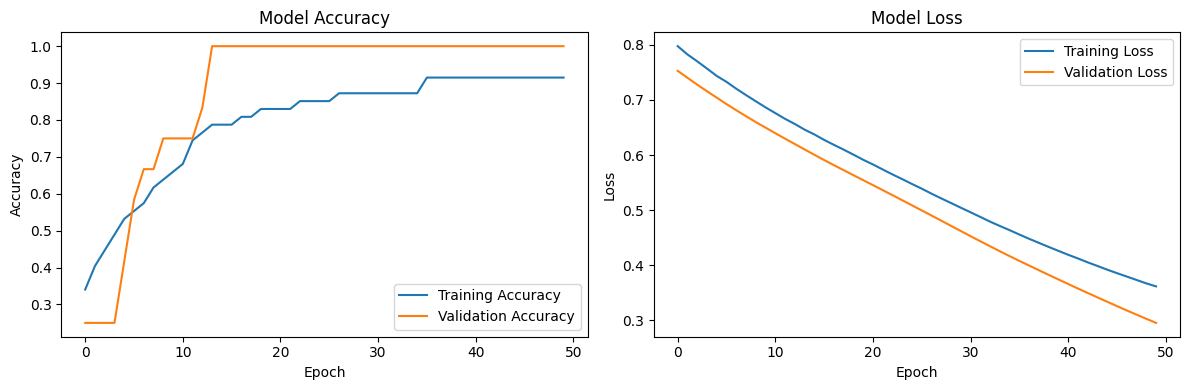

In [11]:
# Visualize training progress
plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
# Generate predictions on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [13]:
# Display detailed classification metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))



Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        34
           1       0.00      0.00      0.00         6

    accuracy                           0.85        40
   macro avg       0.42      0.50      0.46        40
weighted avg       0.72      0.85      0.78        40


Confusion Matrix:
[[34  0]
 [ 6  0]]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  